In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# Gerando dados já conhecidos/classificados
np.random.seed(1)

# Definindo as características dos clusters
cluster_0_centro = [0.5, 0.5]
cluster_0_desvio_padrao = 0.5

cluster_1_centro = [1, 1]
cluster_1_desvio_padrao = 0.5

# Gerando dados para o cluster 0
X_cluster_0 = np.random.randn(15, 2) * cluster_0_desvio_padrao + cluster_0_centro
Y_cluster_0 = np.zeros(15)

# Gerando dados para o cluster 1
X_cluster_1 = np.random.randn(15, 2) * cluster_1_desvio_padrao + cluster_1_centro
Y_cluster_1 = np.ones(15)

# Concatenando os dados dos dois clusters
X = np.concatenate((X_cluster_0, X_cluster_1))
Y = np.concatenate((Y_cluster_0, Y_cluster_1))



In [83]:
dados = pd.DataFrame({'X': X[:, 0], 'Y': X[:, 1], 'Grupo': Y})

In [84]:
dados.head(30)

,X,Y,Grupo
0,1.312173,0.194122,0.0
1,0.235914,-0.036484,0.0
2,0.932704,-0.650769,0.0
3,1.372406,0.119397,0.0
4,0.659520,0.375315,0.0
5,1.231054,-0.530070,0.0
6,0.338791,0.307973,0.0
7,1.066885,-0.049946,0.0
8,0.413786,0.061071,0.0
9,0.521107,0.791408,0.0


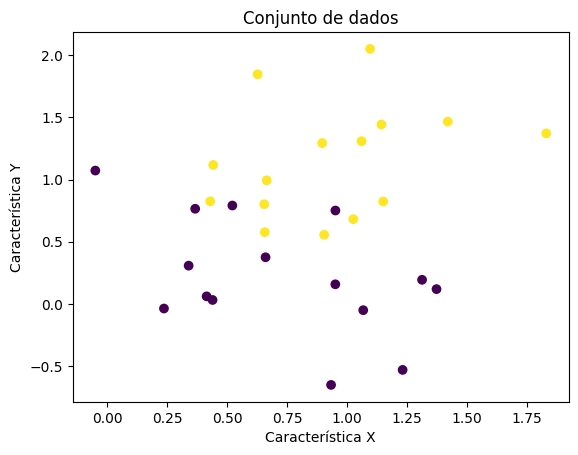

In [85]:
# Plotando os dados
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Característica X')
plt.ylabel('Característica Y')
plt.title('Conjunto de dados')
plt.show()

In [86]:
cluster_teste_centro = [0.75, 0.75]
cluster_teste_desvio_padrao = 1
X_teste = np.random.randn(10, 2) * cluster_teste_desvio_padrao + cluster_teste_centro

In [87]:
X_teste

array([[-0.00439794,  2.00286816],
       [ 1.26292982,  0.45190716],
       [ 1.23851815,  0.67442829],
       [ 1.88162939,  2.26981682],
       [ 2.93557541, -0.64649634],
       [-0.69411381,  0.24553414],
       [ 0.91003707,  1.62616892],
       [ 1.06563495, -1.27220122],
       [ 0.44379599,  1.57797464],
       [ 0.98009474,  1.51201118]])

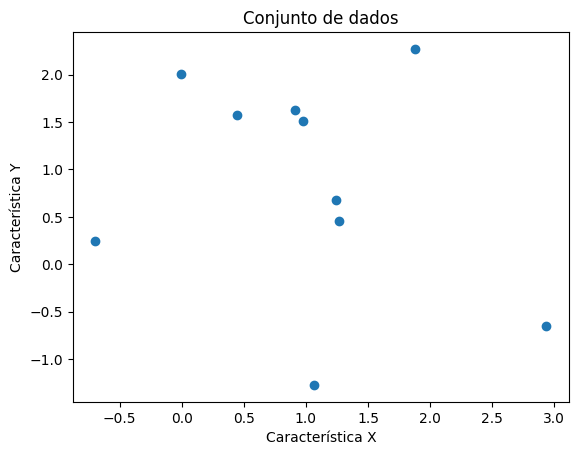

In [88]:
plt.scatter(X_teste[:, 0], X_teste[:, 1])
plt.xlabel('Característica X')
plt.ylabel('Característica Y')
plt.title('Conjunto de dados')
plt.show()

In [98]:
k = 5
dados_teste = pd.DataFrame({'X': X_teste[:, 0],'Y': X_teste[:, 1]})
Y_teste = []
for i in range(len(X_teste)):
    dados['distancia'] = np.sqrt((dados['X'] - X_teste[i][0])**2 + (dados['Y'] - X_teste[i][1])**2)
    vizinhos = dados.nsmallest(k, 'distancia')
    cont = vizinhos['Grupo'].value_counts()
    print(cont)
    try:
        if cont[0] == 5:
            Y_teste.append(0)
        elif cont[0] > cont[0]:
            Y_teste.append(0)
        else:
            Y_teste.append(1)
    except:
        if cont[1] == 5:
            Y_teste.append(1)
        elif cont[0] < cont[1]:
            Y_teste.append(1)
        else:
            Y_teste.append(0)

Grupo
1.0    4
0.0    1
Name: count, dtype: int64
Grupo
1.0    3
0.0    2
Name: count, dtype: int64
Grupo
1.0    3
0.0    2
Name: count, dtype: int64
Grupo
1.0    5
Name: count, dtype: int64
Grupo
0.0    5
Name: count, dtype: int64
Grupo
0.0    5
Name: count, dtype: int64
Grupo
1.0    5
Name: count, dtype: int64
Grupo
0.0    5
Name: count, dtype: int64
Grupo
1.0    5
Name: count, dtype: int64
Grupo
1.0    5
Name: count, dtype: int64


In [99]:
dados_teste['Grupo'] = Y_teste
dados_teste

,X,Y,Grupo
0,-0.004398,2.002868,1
1,1.262930,0.451907,1
2,1.238518,0.674428,1
3,1.881629,2.269817,1
4,2.935575,-0.646496,0
5,-0.694114,0.245534,0
6,0.910037,1.626169,1
7,1.065635,-1.272201,0
8,0.443796,1.577975,1
9,0.980095,1.512011,1


In [100]:
X_resultado = np.concatenate((X_teste, X))
Y_resultado = np.concatenate((Y_teste, Y))

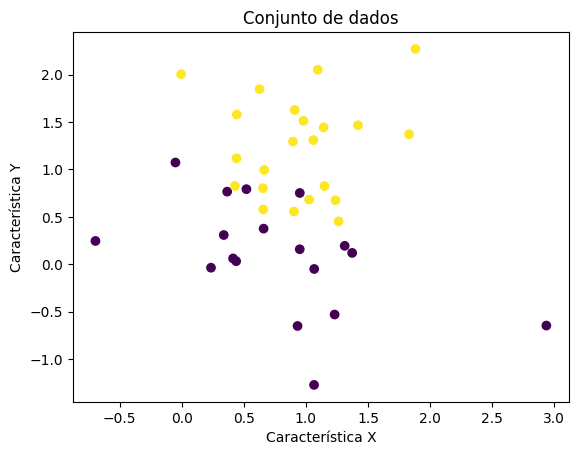

In [101]:
plt.scatter(X_resultado[:, 0], X_resultado[:, 1], c=Y_resultado)
plt.xlabel('Característica X')
plt.ylabel('Característica Y')
plt.title('Conjunto de dados')
plt.show()